In [6]:
%matplotlib inline

In [7]:
import sys
import numpy as np
import os
import matplotlib.pyplot as plt


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

In [8]:
def run(context_frame_size):
    train_data = np.load('workdir/train_tr_MFCC_0_D_A_norm_data_context_{}.npy'.format(str(context_frame_size)))
    train_labels = np.load('workdir/train_tr_MFCC_0_D_A_norm_labels_context_{}.npy'.format(str(context_frame_size)))
    val_data = np.load('workdir/train_va_MFCC_0_D_A_norm_data_context_{}.npy'.format(str(context_frame_size)))
    val_labels = np.load('workdir/train_va_MFCC_0_D_A_norm_labels_context_{}.npy'.format(str(context_frame_size)))
    test_data = np.load('workdir/test_MFCC_0_D_A_norm_data_context_{}.npy'.format(str(context_frame_size)))
    test_labels = np.load('workdir/test_MFCC_0_D_A_norm_labels_context_{}.npy'.format(str(context_frame_size)))

    print("Shape of training, validation and test data and corresponding labels")
    for data, labels in [(train_data, train_labels), (val_data, val_labels), (test_data, test_labels)]:
        print(data.shape, labels.shape)
        
    print(train_data.shape)
    X_train = np.transpose(train_data, (3, 0, 2, 1))
    Y_train_num = train_labels
    X_val = np.transpose(val_data, (3, 0, 2, 1))
    Y_val_num = val_labels
    X_test = np.transpose(test_data, (3, 0, 2, 1))
    Y_test_num = test_labels

    nb_classes = 64 #number of phonemes

    Y_train = np_utils.to_categorical(Y_train_num, nb_classes)
    Y_val = np_utils.to_categorical(Y_val_num, nb_classes)
    Y_test = np_utils.to_categorical(Y_test_num, nb_classes)


    print("Shape of re-ordered training, validation and test data and corresponding labels")
    for data, labels in [(X_train, Y_train), (X_val, Y_val), (X_test, Y_test)]:
        print(data.shape, labels.shape)
        
    if not use_pretrained_model:
        model = Sequential()
        model.add(Convolution2D(32, (3, 3), padding='same',
                                input_shape=(context_frame_size, 13, 3), activation='relu'))
        #model.add(Convolution2D(32, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
        #model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
    #    model.add(Convolution2D(64, (3, 3), activation='relu'))
        #model.add(MaxPooling2D(pool_size=(1, 1)))
        model.add(Dropout(0.1))
        #model.add(Convolution2D(32, (3, 3), activation='relu'))
        #model.add(MaxPooling2D(pool_size=(2, 2)))
        #model.add(Dropout(0.1))

        model.add(Flatten())
        model.add(Dense(28))
        model.add(Activation('relu'))
        model.add(Dense(nb_classes))
        model.add(Activation('softmax'))

        model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0), metrics=['accuracy'])
        history = model.fit(X_train, Y_train, batch_size=64, epochs=40, verbose=2, validation_data=(X_val, Y_val))
        loss_and_metrics = model.evaluate(X_test, Y_test, verbose=0)
        print(loss_and_metrics)
        [print("Error rate:{}".format(1-loss_and_metrics[1]))]

    else:
        from keras.models import load_model
        model = load_model('pretrained_model_name')
        
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

Shape of training, validation and test data and corresponding labels
(19, 3, 13, 1359661) (1359661,)
(19, 3, 13, 147731) (147731,)
(19, 3, 13, 1527014) (1527014,)
(19, 3, 13, 1359661)
Shape of re-ordered training, validation and test data and corresponding labels
(1359661, 19, 13, 3) (1359661, 64)
(147731, 19, 13, 3) (147731, 64)
(1527014, 19, 13, 3) (1527014, 64)
Train on 1359661 samples, validate on 147731 samples
Epoch 1/40
414s - loss: 1.0693 - acc: 0.6759 - val_loss: 0.7107 - val_acc: 0.7653
Epoch 2/40
109s - loss: 0.6906 - acc: 0.7687 - val_loss: 0.6115 - val_acc: 0.7925
Epoch 3/40
109s - loss: 0.6292 - acc: 0.7860 - val_loss: 0.5804 - val_acc: 0.7996
Epoch 4/40
109s - loss: 0.5977 - acc: 0.7951 - val_loss: 0.5604 - val_acc: 0.8069
Epoch 5/40
109s - loss: 0.5764 - acc: 0.8009 - val_loss: 0.5465 - val_acc: 0.8110
Epoch 6/40
109s - loss: 0.5613 - acc: 0.8058 - val_loss: 0.5266 - val_acc: 0.8174
Epoch 7/40
109s - loss: 0.5485 - acc: 0.8099 - val_loss: 0.5270 - val_acc: 0.8175
Epoch 

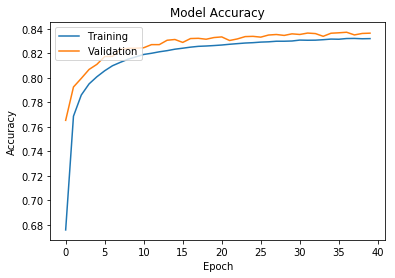

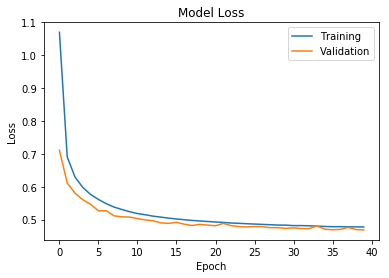

In [9]:
use_pretrained_model = False
pretrained_model_name = ""
context_frame_size = 19

#run(3)
run(19)

In [10]:
#model.save('models/context_19_conv32_3_3_padding_pool2_2_2_conv64_3_3_padding_pool_2_2dropout_0.1_64dense_80.81.5acc.h5')